<h3>EDA - Análisis exploratorio de los datos sobre siniestros viales</h3>

<p style="font-size:19px;">El siguiente es un análisis exploratorio de los datos sobre siniestros viales en Argentina. </p>

<p style="font-size:17px;"><u>Importo las librerías a utilizar</u> </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<p style="font-size:17px;"><u>Lectura de los datos disponibles</u></p>
<p style="font-size:15px;">Leo el dataset y lo transformo a dataframes con Pandas</p>

In [2]:

ruta = 'Datasets/homicidios.xlsx'
hechos = pd.read_excel(ruta, sheet_name='HECHOS')
victimas = pd.read_excel(ruta, sheet_name='VICTIMAS')

In [3]:

hechos.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<p style="font-size:15px;">Observo los datos y columnas del dataset hechos</p>

In [4]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<p style="font-size:15px;">Observo los datos y columnas del dataset víctimas</p>

In [5]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [6]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


<p style="font-size:18px;"><u>Verificación de la existencia de valores nulos</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset hechos</p>

In [7]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

<p style="font-size:16px;">Los datos nulos corresponden a la altura de la calle y el cruce. Decidí no borrarlos ni rellenarlos porque no me pareció que incidan en el análisis. </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset víctimas</p>

In [8]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

<p style="font-size:18px;"><u>Valores outliers</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores outliers mediante el Método del Rango Intercuartil (IQR)</p>
<p style="font-size:15px;">El método IQR es una técnica común para detectar outliers. Los valores que caen por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR son considerados outliers.</p>

In [9]:

def detectar_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers_hechos = detectar_outliers_iqr(hechos)
print("Outliers en 'hechos':")
for column, outliers in outliers_hechos.items():
    print(f"{column}: {len(outliers)} outliers")


outliers_victimas = detectar_outliers_iqr(victimas)
print("\nOutliers en 'victimas':")
for column, outliers in outliers_victimas.items():
    print(f"{column}: {len(outliers)} outliers")


Outliers en 'hechos':
N_VICTIMAS: 20 outliers
AAAA: 0 outliers
MM: 0 outliers
DD: 0 outliers
Altura: 7 outliers
COMUNA: 0 outliers

Outliers en 'victimas':
AAAA: 0 outliers
MM: 0 outliers
DD: 0 outliers


<p style="font-size:15px;">Calculo la media de la columna N_VICTIMAS para ver cómo influyen los outliers</p>

In [10]:
media_n_victimas = hechos['N_VICTIMAS'].mean()
media_n_victimas

1.0301724137931034

<p style="font-size:16px;">Al analizar los valores outliers y contrastarlo con el dataset, se puede observar que los valores que se presentan como outliers en N_VICTIMAS simplemente se refiere a valores que van por fuera de la media que es 1. </p>

<p style="font-size:16px;">La otra columna que presenta valores outliers es la de Altura, pero no tiene sentido realizar un análisis de la misma ya que los valores no están representados por un promedio, sino que representan un número de calle </p>

<p style="font-size:18px;"><u>Verificación de la existencia de registros duplicados </u> </p>

<p style="font-size:15px;">Busco registros duplicados en los datasets hechos y víctimas</p>

In [10]:
duplicados_hechos = hechos[hechos.duplicated()]

In [11]:
duplicados_victimas = victimas[victimas.duplicated()]

<p style="font-size:18px;"><u>Matriz de correlación</u></p>

<p style="font-size:15px;"> Selecciono las columnas N_Victimas, AAAA (año) y Comuna, para establecer una matriz de correlación.</p>


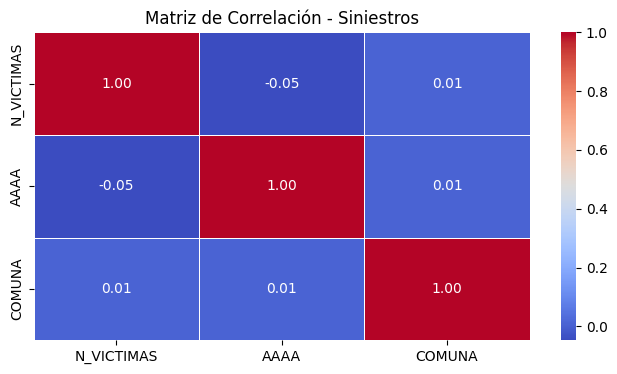

In [13]:
columnas_seleccionadas = ['N_VICTIMAS', 'AAAA', 'COMUNA']
hechos_subset = hechos[columnas_seleccionadas]

correlation_matrix = hechos_subset.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación - Siniestros')
plt.show()

<p style="font-size:16px;">Observando la matriz de correlación podemos ver cómo el número de víctimas, el año y la comuna se vinculan 
estrechamente. </p>

<p style="font-size:18px;"><u>Número de víctimas por año</u></p>

<p style="font-size:15px;"> Agrupo los datos por el año y sumo el número de víctimas para cada año.</p>

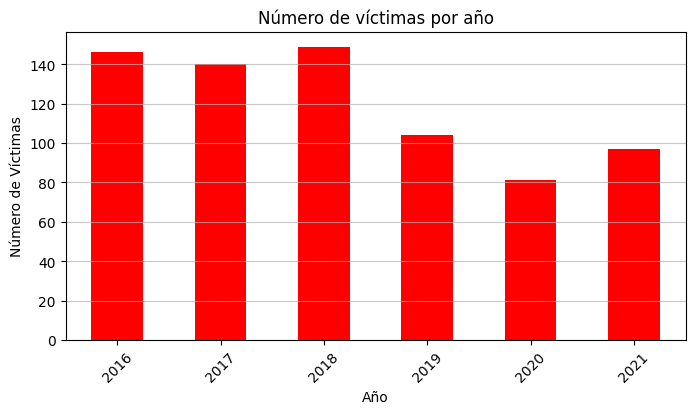

In [12]:
victimas_por_anio = hechos.groupby('AAAA')['N_VICTIMAS'].sum()

plt.figure(figsize=(8, 4))
victimas_por_anio.plot(kind='bar', color='red')
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)  
plt.grid(axis='y', alpha=0.7)  
plt.show()

<p style="font-size:16px;">Al analizar el gráfico podemos observar que el año 2018 fue el año con mayor cantidad de víctimas de fallecimiento por siniestros viales, seguido del año 2016. </p>

<p style="font-size:18px;"><u>Cantidad de victimas por sexo</u></p>

<p style="font-size:15px;"> Analizo la cantidad de víctimas de accidentes de tránsito por sexo.</p>

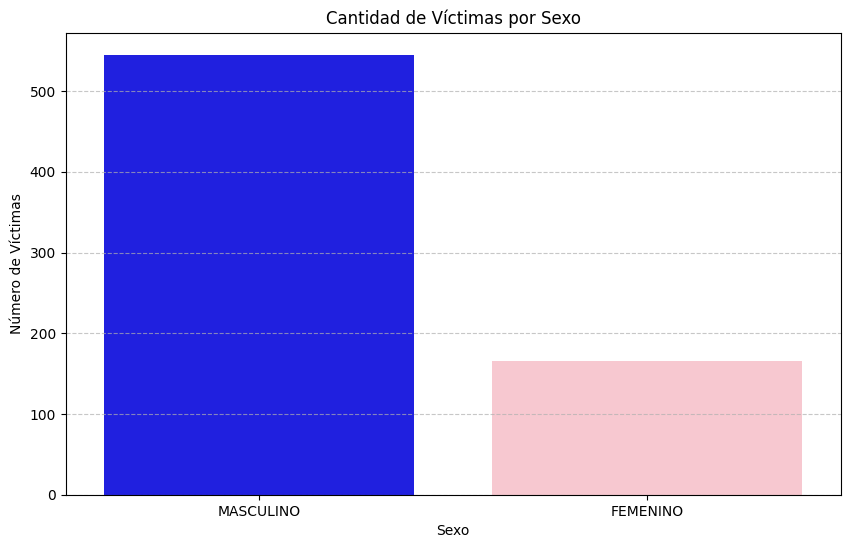

In [13]:
victimas = victimas[victimas['SEXO'] != 'SD']

combined_df = pd.merge(hechos, victimas, left_on='ID', right_on='ID_hecho')

victimas_por_sexo = combined_df['SEXO'].value_counts().reset_index()
victimas_por_sexo.columns = ['SEXO', 'N_VICTIMAS']

plt.figure(figsize=(10, 6))
sns.barplot(data=victimas_por_sexo, x='SEXO', y='N_VICTIMAS', color='blue')  
sns.barplot(data=victimas_por_sexo[victimas_por_sexo['SEXO'] == 'FEMENINO'], x='SEXO', y='N_VICTIMAS', color='pink') 
plt.title('Cantidad de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<p style="font-size:16px;">Al analizar el gráfico podemos observar la gran diferencia que existe en cuanto a las víctimas por sexo en los siniestros viales, siendo ampliamente mayor la cantidad de víctimas de sexo masculino que femenino. </p>

<p style="font-size:15px;">Calculo los porcentajes de víctimas por sexo.</p>

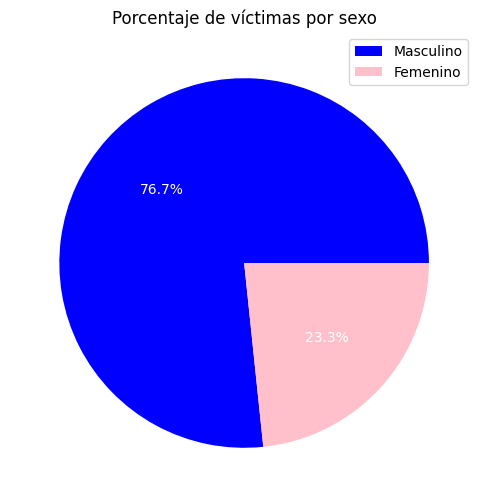

In [14]:
total_victimas = victimas_por_sexo['N_VICTIMAS'].sum()
porcentajes = victimas_por_sexo['N_VICTIMAS'] / total_victimas * 100

plt.figure(figsize=(6, 6))
plt.pie(porcentajes, labels=victimas_por_sexo['SEXO'], autopct='%1.1f%%', colors=['blue', 'pink'], textprops={'color': 'white'})
plt.legend(loc='upper right', labels=['Masculino', 'Femenino'])
plt.title('Porcentaje de víctimas por sexo')
plt.show()

<p style="font-size:16px;">En este gráfico de torta podemos apreciar mejor la enorme diferencia de porcentajes de víctimas de sexo masculino por sobre el femenino </p>

<p style="font-size:18px;"><u>Tipo de vehículo víctima de siniestros viales</u></p>

<p style="font-size:15px;">Muestro los tipos de vehículos víctimas de siniestros viales</p>

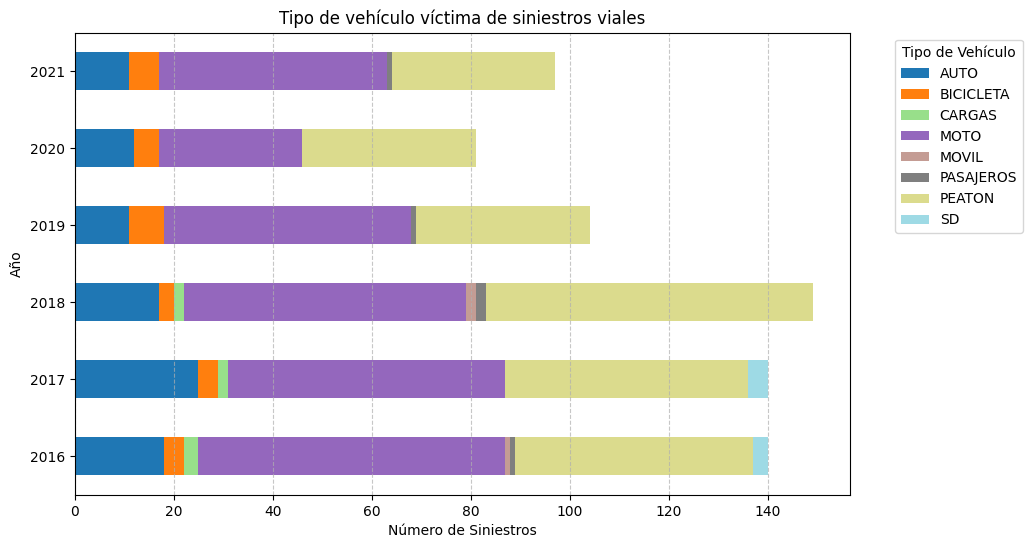

In [15]:

vehiculos_por_anio = victimas.groupby(['AAAA', 'VICTIMA']).size().unstack().fillna(0)


vehiculos_por_anio.plot(kind='barh', stacked=True, figsize=(10 , 6), colormap='tab20')
plt.title('Tipo de vehículo víctima de siniestros viales')
plt.xlabel('Número de Siniestros')
plt.ylabel('Año')
plt.legend(title='Tipo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Como podemos observar en el gráfico, las motos y los peatones son los dos elementos que más accidentes viales han tenido a lo largo de los años, seguidos de los autos. </p>

<p style="font-size:18px;"><u>Siniestros viales por acusado</u></p>

<p style="font-size:15px;">Muestro los siestros viales por acusados</p>

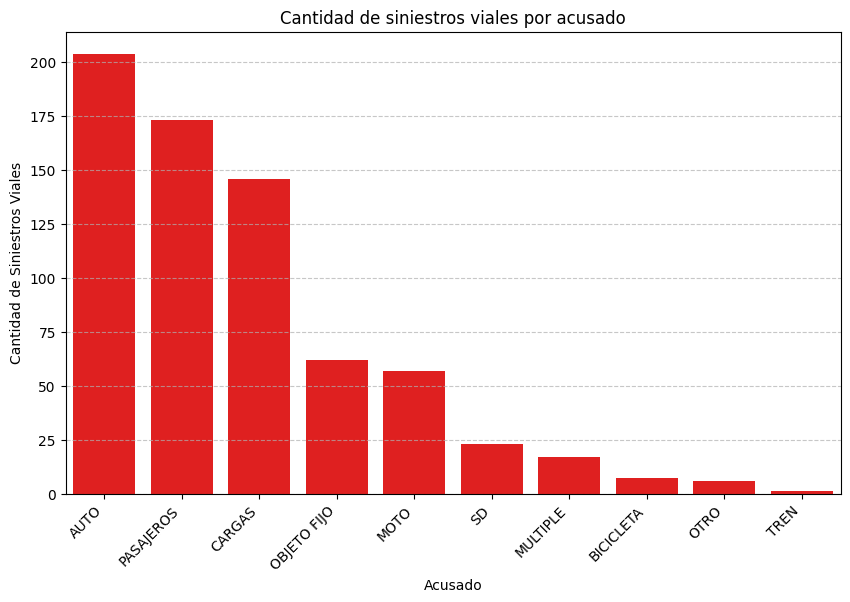

In [19]:
acusados_counts = hechos['ACUSADO'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=acusados_counts.index, y=acusados_counts.values, color='red')
plt.title('Cantidad de siniestros viales por acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Siniestros Viales')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que los autos encabezan los causantes de siniestros viales, seguidos de los pasajeros y las cargas. </p>

<p style="font-size:18px;"><u>Siniestros viales por comuna</u></p>

<p style="font-size:15px;">Muestro los siestros viales por comuna</p>

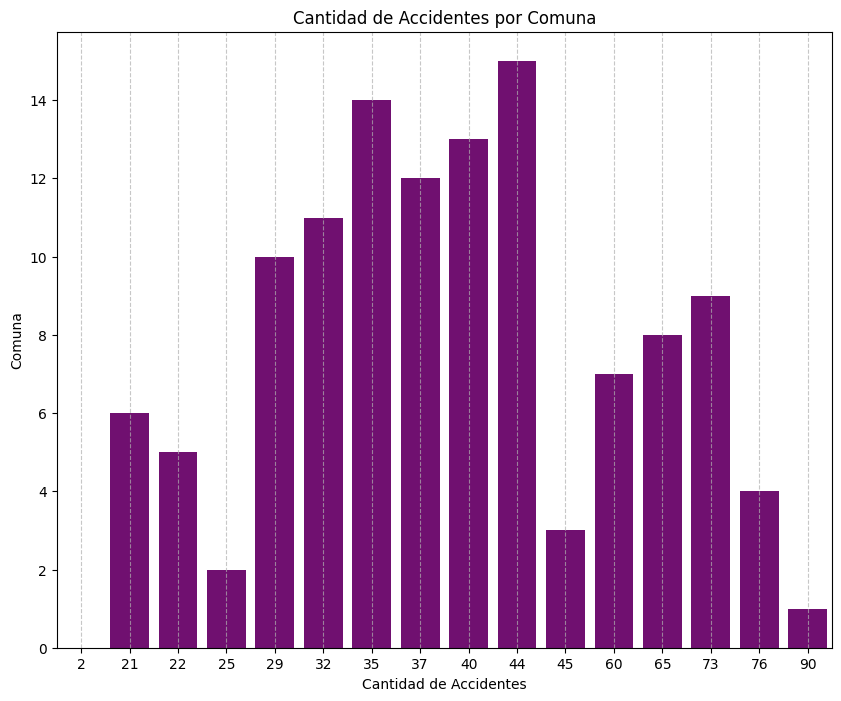

In [22]:
# Cuento la cantidad de accidentes por comuna
accidentes_por_comuna = hechos['COMUNA'].value_counts()

# Configuro el gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=accidentes_por_comuna.values, y=accidentes_por_comuna.index, color='purple')
plt.title('Cantidad de Accidentes por Comuna')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Comuna')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que la comuna con mayor cantidad de accidentes es la 44, seguida de la 35 y la 40. Este dato nos sirve porque podemos ver en qué se puede estar fallando en cuanto a vías de comunicación en las distintas comunas y los arreglos necesarios que habría que hacer para evitar los siniestros. </p>

<p style="font-size:18px;"><u>Top 10 de calles y cruces con mayor cantidad de accidentes</u></p>

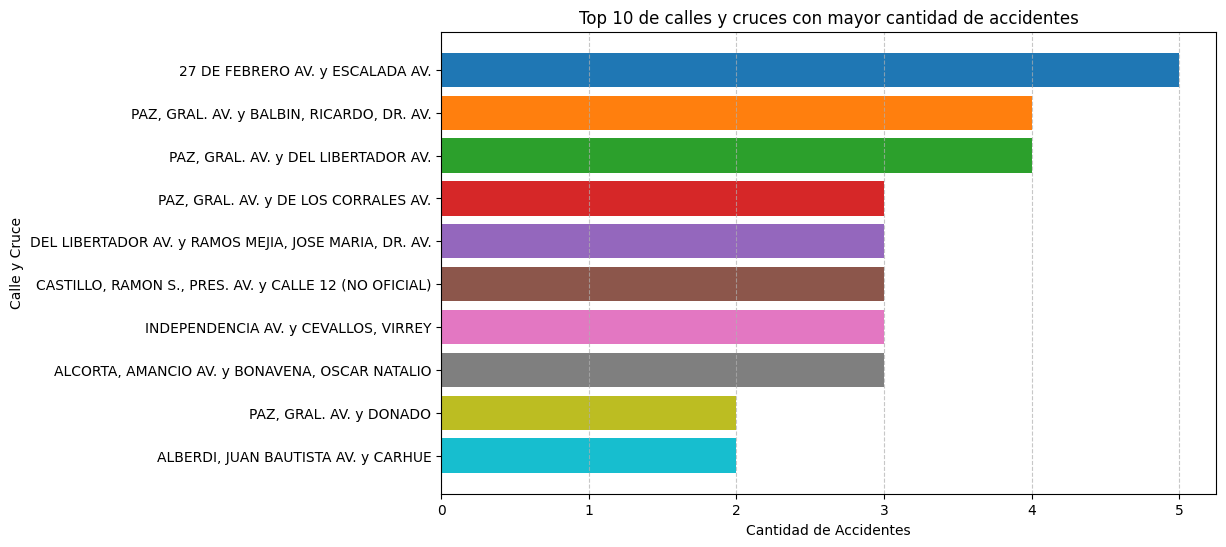

In [35]:
hechos['Calle_Cruce'] = hechos['Calle'] + ' y ' + hechos['Cruce']

accidentes_por_calle_cruce = hechos['Calle_Cruce'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
for i, (calle_cruce, count) in enumerate(accidentes_por_calle_cruce.items()):
    plt.barh(calle_cruce, count, color=plt.cm.tab10(i))  
plt.gca().invert_yaxis() 
plt.title('Top 10 de calles y cruces con mayor cantidad de accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Calle y Cruce')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<p style="font-size:16px;">Al observar el gráfico podemos ver los puntos neurálgicos donde más cantidades de accidentes se producen, siendo el punto que une la Av 27 de Febrero con la Av Escalada el que más accidentes tiene. Este dato es muy importante porque permite al gobierno analizar por qué se producen accidentes en estos cruces y preveer la forma de evitarlos. </p>

<p style="font-size:18px;"><u>Siniestros viales por tipo de calle</u></p>

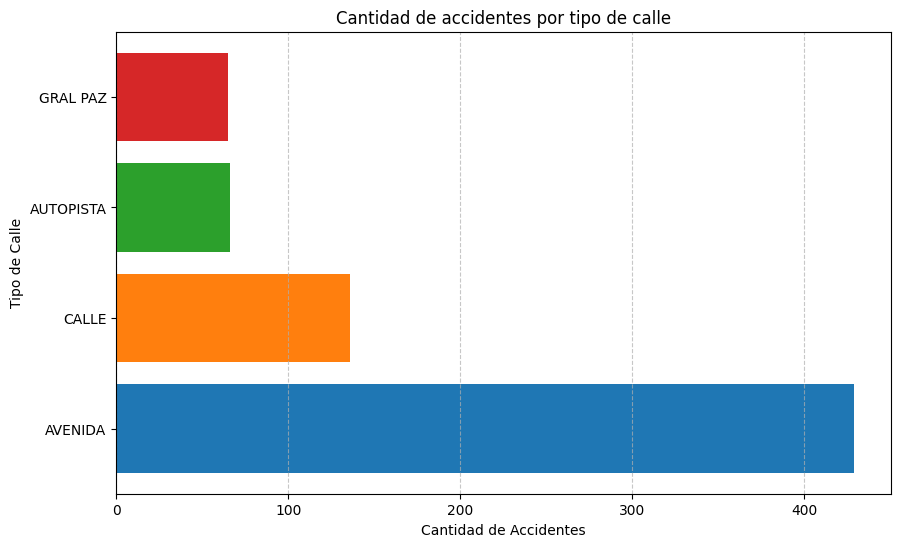

In [28]:
accidentes_por_tipo_de_calle = hechos['TIPO_DE_CALLE'].value_counts()

plt.figure(figsize=(10, 6))
for i, (tipo_calle, count) in enumerate(accidentes_por_tipo_de_calle.items()):
    plt.barh(tipo_calle, count, color=plt.cm.tab10(i))  
plt.title('Cantidad de accidentes por tipo de calle')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Calle')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que la avenida es el tipo de calle que más accidentes de tránsito genera, seguido de una calle común. Este dato nos sirve para ver cómo el gobierno puede mejorar las avenidas con señalizaciones u otro tipo de recursos para disminuir la cantidad de siniestros. </p>

<p style="font-size:18px;"><u>Cantidad de accidentes por hora</u></p>

<p style="font-size:15px;">Muestro la cantidad de accidentes por hora </p>

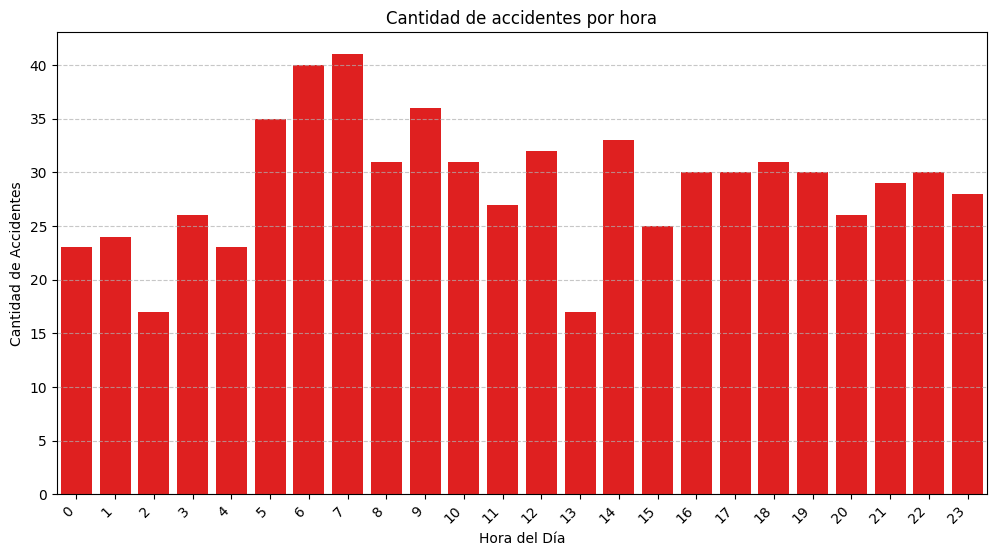

In [34]:
hechos['HH'] = pd.to_numeric(hechos['HH'], errors='coerce')

hechos = hechos.dropna(subset=['HH'])

hechos['HH'] = hechos['HH'].astype(int)

accidentes_por_hora = hechos['HH'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, color='red')
plt.title('Cantidad de accidentes por hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que entre las 6 y 7 de la mañana es el momento donde más cantidad de accidentes de tránsito hay. Este dato es muy importante porque permite evaluar si la mayor cantidad de accidentes se producen de día o de noche y por qué. Por ejemplo, si los accidentes son de noche se puede deber a factores como la falta de visibilidad, o el consumo de alguna sustancia producto de una salida a un bar, etc. </p>